In [1]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("DESeq2")
library("DESeq2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.9 (BiocManager 1.30.9), ?BiocManager::install for help
Bioconductor version 3.9 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'DESeq2'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'foreach', 'foreign', 'formatR', 'fs', 'ggplot2', 'glmnet', 'gower', 'haven',
  'hexbin', 'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'ipred',
  'IRkernel', 'iterators', 'KernSmooth', 'knitr', 'later', 'lava', 'markdown',
  'MASS', 'mgcv', 'mime', 'modelr', 'nlme', 'numDeriv', 'openssl', 'pillar',
  'pkgconfig', 'processx', 'progress', 'promises', 'purrr', 'quantmod', 'Rcpp',
  'recipes', 'repr', 'reprex', 'rmarkdown', 'rvest', 'shiny', 'sys', 'tibble',
  'tidyr', 'tinytex', 'TTR', 'whisker', 'xfun', '

In [18]:
BiocManager::install("vsn")


Bioconductor version 3.9 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'vsn'
also installing the dependencies ‘affyio’, ‘preprocessCore’, ‘affy’, ‘limma’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'foreach', 'foreign', 'formatR', 'fs', 'ggplot2', 'glmnet', 'gower', 'haven',
  'hexbin', 'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'ipred',
  'IRkernel', 'iterators', 'KernSmooth', 'knitr', 'later', 'lava', 'markdown',
  'MASS', 'mgcv', 'mime', 'modelr', 'nlme', 'numDeriv', 'openssl', 'pillar',
  'pkgconfig', 'processx', 'progress', 'promises', 'purrr', 'quantmod', 'Rcpp',
  'recipes', 'repr', 'reprex', 'rmarkdown', 'rvest', 'shiny', 'sys', 'tibble',
  'tidyr', 'tinytex', 'TTR', 'whisker', 'xfun', 'xml2'


In [4]:
library(magrittr) # this will allow us to string commands together in a UNIX -pipe - like fashion using % >%

 # get the table of read counts by indicating the path to the file
readcounts <-read.table ("./raw_countstdl.tsv", header = TRUE)
head(readcounts)
str(readcounts)

,ctl1,ctl2,ctl3,ctl4,treat1,treat2,treat3,treat4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


'data.frame':	45706 obs. of  8 variables:
 $ ctl1  : int  0 0 2 0 0 0 0 0 0 0 ...
 $ ctl2  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ ctl3  : int  0 0 1 0 0 0 0 0 0 0 ...
 $ ctl4  : int  0 0 1 0 0 0 0 0 0 0 ...
 $ treat1: int  0 1 11 0 0 0 0 0 0 0 ...
 $ treat2: int  0 0 2 0 0 0 0 0 0 0 ...
 $ treat3: int  0 0 1 0 0 0 0 0 0 0 ...
 $ treat4: int  0 0 24 0 0 0 0 0 0 0 ...


In [7]:
 # make a data.frame with meta-data where row.names should match the individual sample names
 sample_info <- data.frame(condition = gsub ( "ctl[1-4]+" , "ctl" , names(readcounts)), row.names = names(readcounts))
 sample_info


,condition
ctl1,ctl
ctl2,ctl
ctl3,ctl
ctl4,ctl
treat1,treat1
treat2,treat2
treat3,treat3
treat4,treat4


In [10]:
 # generate the DESeqDataSet
DESeq.ds <- DESeqDataSetFromMatrix(countData = readcounts, colData = sample_info, design = ~condition )

 # check the result :
colData(DESeq.ds ) %>% head
assay(DESeq.ds, "counts" ) %>% head
rowData(DESeq.ds) %>% head


DataFrame with 6 rows and 1 column
       condition
        <factor>
ctl1         ctl
ctl2         ctl
ctl3         ctl
ctl4         ctl
treat1    treat1
treat2    treat2

,ctl1,ctl2,ctl3,ctl4,treat1,treat2,treat3,treat4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


DataFrame with 6 rows and 0 columns

In [12]:
 # test what counts() returns
counts(DESeq.ds) %>% str

 # remove genes without any counts
DESeq.ds <- DESeq.ds [rowSums(counts(DESeq.ds)) > 0, ]

 # investigate different library sizes

colSums(counts(DESeq.ds)) == colSums(readcounts) # should be the same as colSums ( readcounts )


 int [1:45706, 1:8] 0 0 2 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:45706] "ENSMUSG00000102693" "ENSMUSG00000064842" "ENSMUSG00000051951" "ENSMUSG00000102851" ...
  ..$ : chr [1:8] "ctl1" "ctl2" "ctl3" "ctl4" ...


ctl1   ctl2   ctl3   ctl4 treat1 treat2 treat3 treat4 
  TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE

In [13]:
#DESeq2’s default method to normalize read counts to account for differences in sequencing depths is imple-
#mented in estimateSizeFactors()
#1. for every gene (= row), determine the geometric mean of its read counts across all samples (yielding
#the ”pseudo-reference”, i.e. one value per gene);
#2. divide every value of the count matrix by the corresponding pseudo-reference value;
#3. for every sample (= column), determine the median of these ratios. This is the size factor.

  # calculate the size factor and add it to the data set
DESeq.ds <- estimateSizeFactors(DESeq.ds)
sizeFactors(DESeq.ds)

 # if you check colData () again , you see that this now contains the sizeFactors
colData (DESeq.ds)

# counts () allows you to immediately retrieve the _ normalized _ read counts
counts.sf_normalized <- counts(DESeq.ds, normalized = TRUE)
 

ctl1      ctl2      ctl3      ctl4    treat1    treat2    treat3    treat4 
0.8613852 0.7601755 0.8089857 0.8337696 0.9487156 0.8192834 0.9787590 4.0539751

DataFrame with 8 rows and 2 columns
       condition        sizeFactor
        <factor>         <numeric>
ctl1         ctl 0.861385212241083
ctl2         ctl 0.760175549092362
ctl3         ctl 0.808985675298092
ctl4         ctl 0.833769556412077
treat1    treat1  0.94871557100813
treat2    treat2 0.819283353107582
treat3    treat3 0.978758960142215
treat4    treat4  4.05397505356715

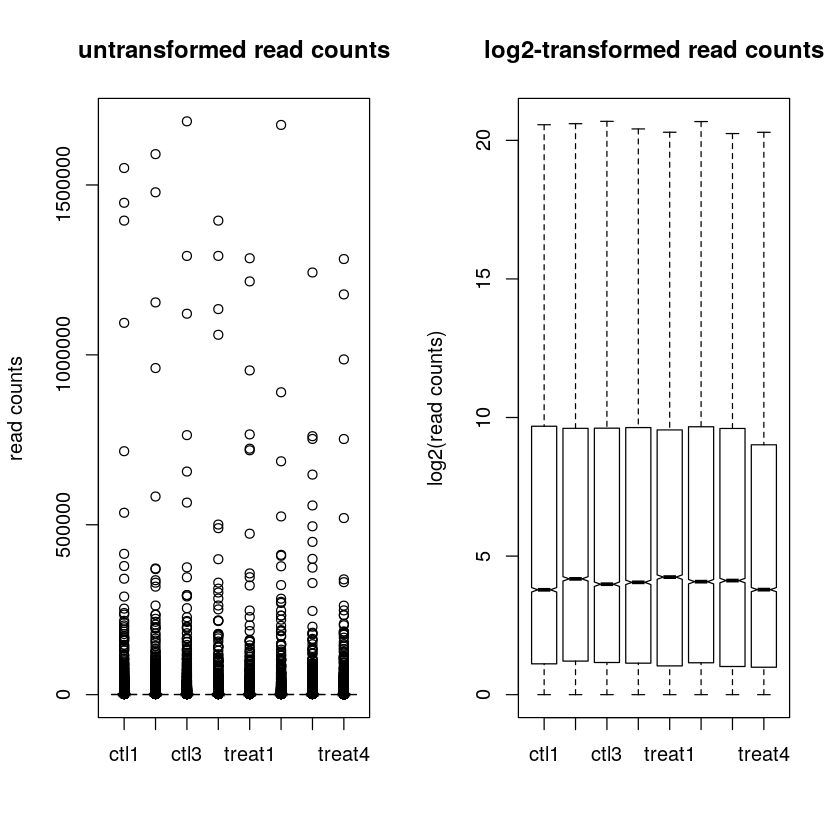

In [20]:
#5.2
#Transformation of sequencing-depth-normalized read counts
#Due to the relatively large dynamic range of expression values that RNA-seq data can cover, many down-
#stream analyses (including clustering) work much better if the read counts are transformed to the log scale
#following normalization. While you will occasionally see log10 transformed read counts, log2 is more com-
#monly used because it is easier to think about doubled values rather than powers of 10. The transformation
#should be done in addition to sequencing depth normalization.

# transform size - factor normalized read counts to log2 scale using pseudocount of 1

log.norm.counts <- log2(counts.sf_normalized + 1)

# plot the following two images underneath each other
par(mfrow = c(1,2))

# boxplots of non-transformed read counts ( one per sample )
boxplot(counts.sf_normalized, notch = TRUE , main = "untransformed read counts" , ylab = "read counts")

# box plots of log2 - transformed read counts
boxplot (log.norm.counts, notch = TRUE , main = "log2-transformed read counts" , ylab = "log2(read counts)")



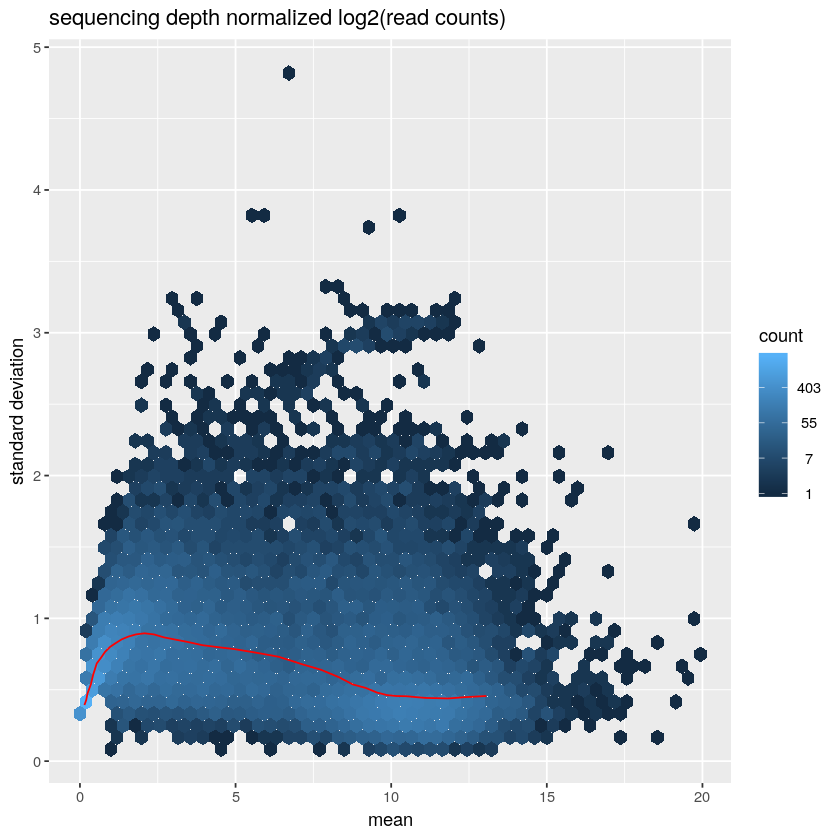

In [22]:
#Many statistical tests and analyses assume that data is homoskedastic, i.e. that all variables have similar
#variance. However, data with large differences among the sizes of the individual observations often shows
#heteroskedastic behavior. One way to visually check for heteroskedasticity is to plot the mean vs. the standard
#deviation.

 #mean - sd plot

library(vsn)
library(ggplot2)
msd_plot <- meanSdPlot(log.norm.counts, ranks = FALSE, plot = FALSE )
msd_plot$gg +
    ggtitle("sequencing depth normalized log2(read counts)") +
    ylab("standard deviation")
 




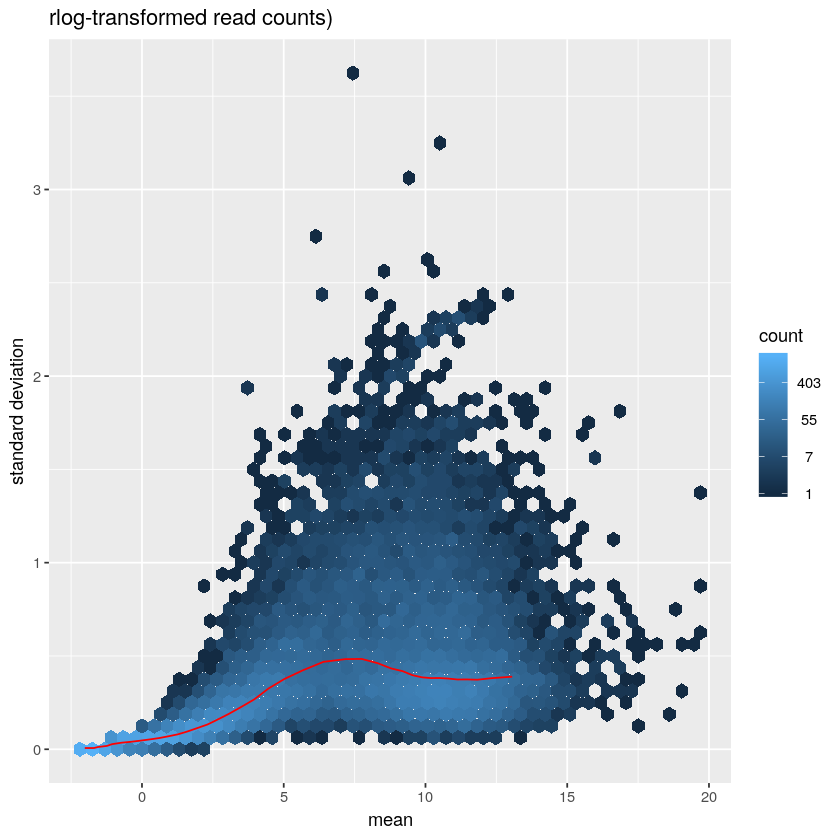

In [24]:
#Transformation of read counts including variance shrinkage
#To reduce the amount of heteroskedasticity, DESeq2 and also edgeR offer several means to shrink the variance
#of low read counts. They do this by using the dispersion-mean trend that can be observed for the entire
#data set as a reference. Consequently, genes with low and highly variable read counts will be assigned more
#homogeneous read count estimates so that their variance resembles the variance observed for the majority
#of the genes (which hopefully have a more stable variance).

  # obtain regularized log - transformed values

#The rlog() function’s blind parameter should be set to FALSE if the different conditions lead to strong differences in a large proportion of the genes. 

DESeq.rlog <- rlog(DESeq.ds , blind = FALSE )
rlog.norm.counts <- assay(DESeq.rlog)

 #mean - sd plot for rlog - transformed data

library(vsn)
library(ggplot2)
msd_plot <- meanSdPlot(rlog.norm.counts, ranks = FALSE, plot = FALSE )
msd_plot$gg +
    ggtitle("rlog-transformed read counts)") +
    ylab("standard deviation")



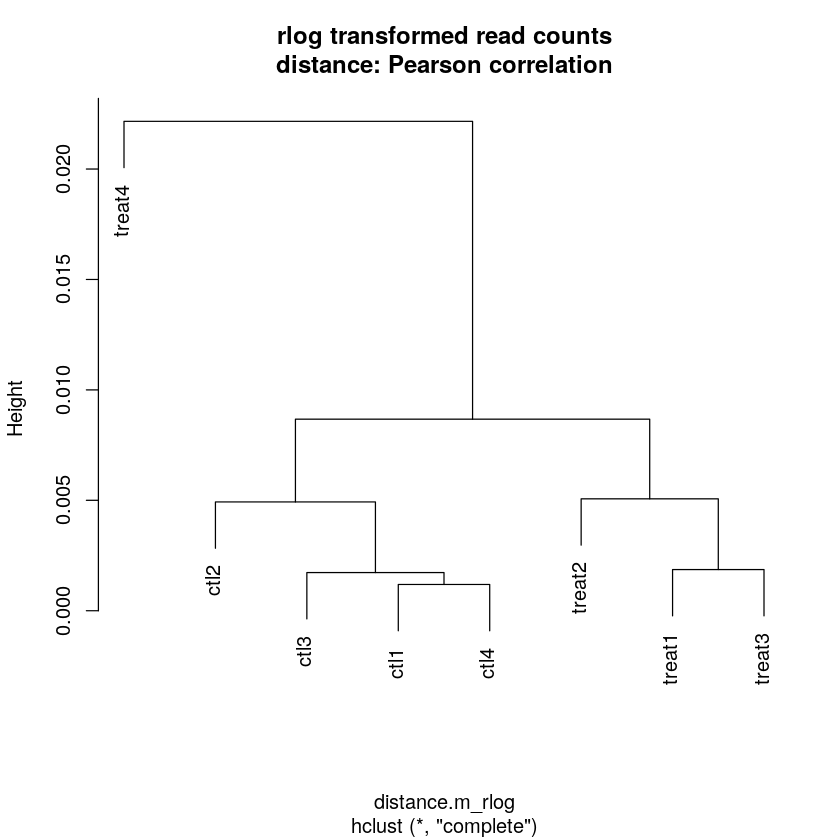

In [25]:
#A dendrogram can be generated in R using the functions cor(), as.dist(), and hclust():

# cor () calculates the correlation between columns of a matrix
distance.m_rlog <- as.dist(1 - cor(rlog.norm.counts , method = "pearson"))

# plot () can directly interpret the output of hclust ()
plot(hclust(distance.m_rlog),
    labels = colnames(rlog.norm.counts) ,
    main = "rlog transformed read counts\ndistance: Pearson correlation")


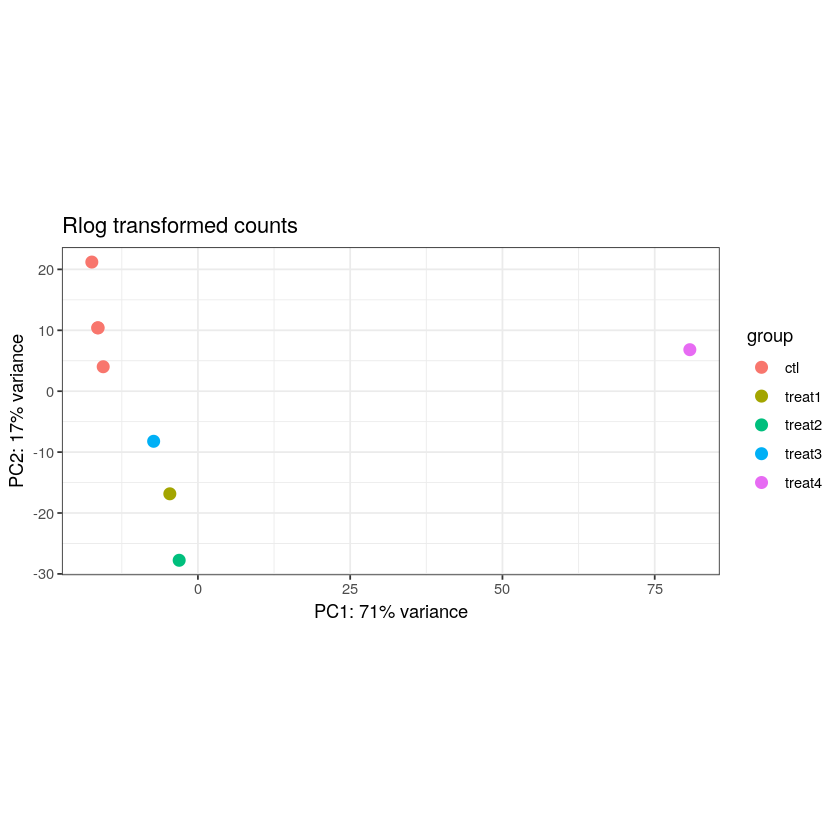

In [30]:
#DESeq2 also offers a convenience function based on ggplot2 to do PCA directly on a DESeqDataSet:

 # PCA
P <- plotPCA (DESeq.rlog)
 # plot cosmetics
P <- P + theme_bw() + ggtitle("Rlog transformed counts")
print(P)


 

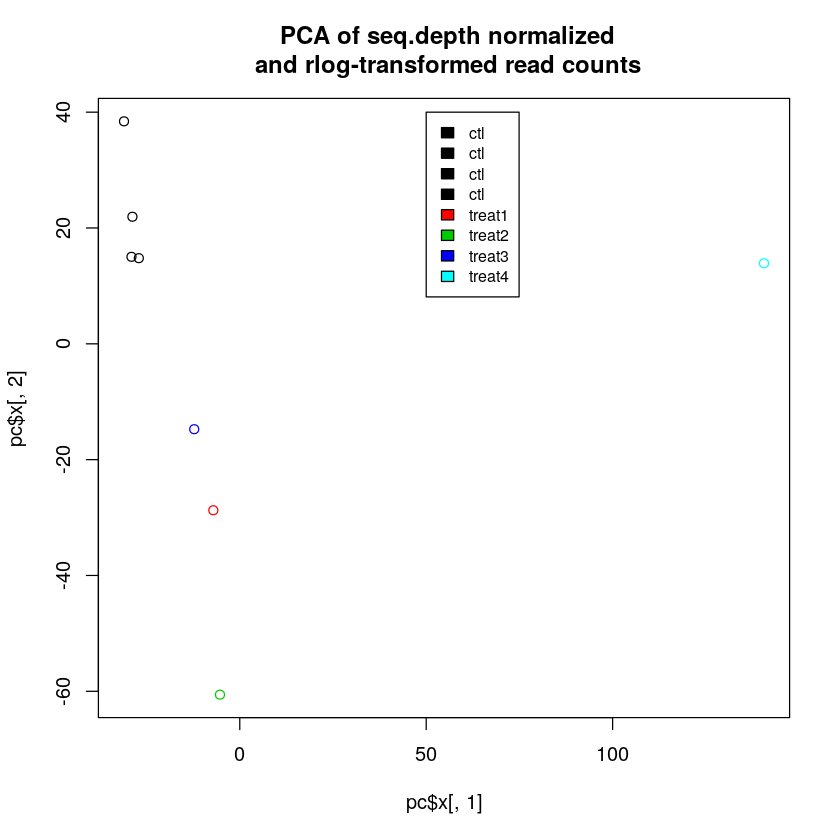

In [37]:
#PCA can be performed in base R using the function prcomp().
pc <- prcomp(t(rlog.norm.counts))

plot(pc$x[,1], pc$x[,2],
    col = colData(DESeq.ds)[,1],
    main = " PCA of seq.depth normalized\n and rlog-transformed read counts")
legend(50,40, legend = colData(DESeq.ds)[,1], col = colData(DESeq.ds)[,1], fill = colData(DESeq.ds)[,1], cex = 0.8 )
